In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r"H:\jpytr_pro\data science\data sets\adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [8]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.isna().values.any()

False

In [10]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
df=df.replace('?',np.nan)

In [13]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,1


In [14]:
df=df.fillna(df.mode().iloc[0])

In [15]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


In [16]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
df.columns = df.columns.str.replace('.', '_')

In [18]:
df.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16212,24,Private,197757,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Female,0,0,40,Philippines,0
22517,40,Private,114580,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,24,United-States,1
8790,20,Private,203003,HS-grad,9,Never-married,Transport-moving,Other-relative,White,Male,0,0,40,United-States,0
10933,58,Local-gov,237879,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,58,United-States,0
12168,41,Private,139907,10th,6,Never-married,Handlers-cleaners,Unmarried,White,Male,0,0,50,United-States,0
29042,26,Private,192022,Bachelors,13,Never-married,Other-service,Other-relative,White,Female,0,0,40,United-States,0
12301,19,Private,145844,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,0
17450,33,Private,69251,Assoc-voc,11,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines,0
21665,52,Private,232132,12th,8,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,1
2608,35,Private,253006,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,38,United-States,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [20]:
print('Continous variables in the dataset are: ')
cont=[]
for i in df.columns:
  if df[i].dtype=='int64':
    cont.append(i)
    print(i,end=', ')
print('\n\nCategorical variable in the dataset are: ')
catg=[]
for i in df.columns:
  if df[i].dtype=='O':
    catg.append(i)
    print(i,end=',  ')

Continous variables in the dataset are: 
age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week, income, 

Categorical variable in the dataset are: 
workclass,  education,  marital_status,  occupation,  relationship,  race,  sex,  native_country,  

In [21]:
df.income.describe()

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [22]:
cont

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

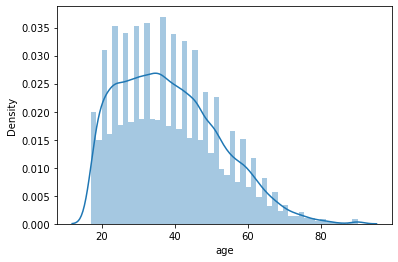

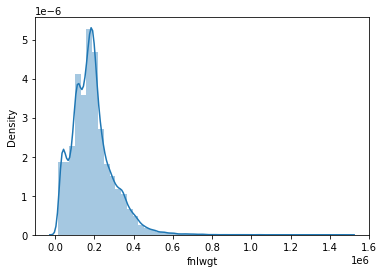

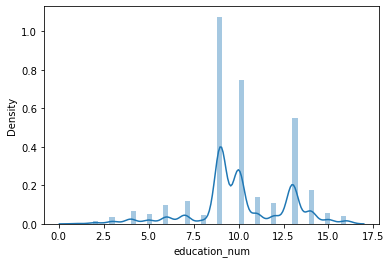

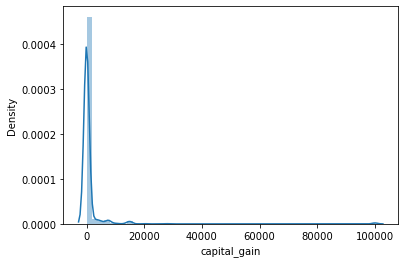

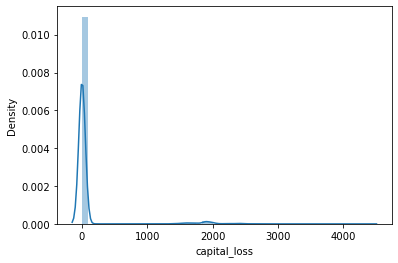

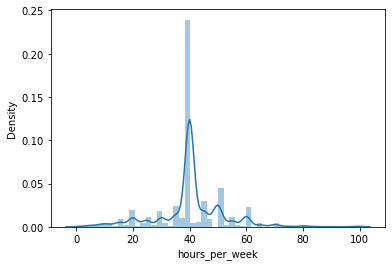

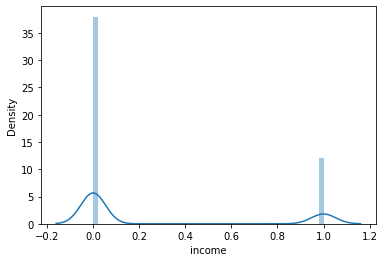

In [23]:
for i in cont:
  sns.distplot(df[i])
  plt.show()

<AxesSubplot:>

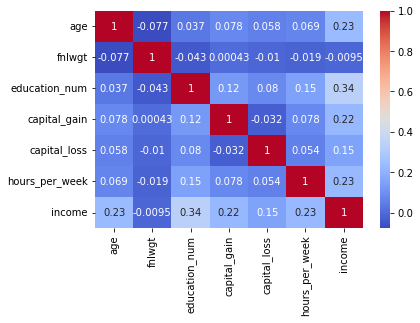

In [24]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [25]:
#Since it has 0 correlation, it can be dropped

df.drop(['fnlwgt'], axis = 1, inplace = True)

In [26]:
dataset=df.copy()

In [27]:
# Distributing Age column in 3 significant parts

dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='income', ylabel='count'>

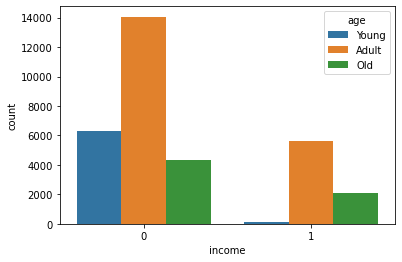

In [28]:
sns.countplot(x = 'income', hue = 'age', data = dataset)

In [29]:
#to combine capital_gain and capital loss a new feature is made capital diff

dataset['Capital_Diff'] = dataset['capital_gain'] - dataset['capital_loss']
dataset.drop(['capital_gain'], axis = 1, inplace = True)
dataset.drop(['capital_loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='income', ylabel='count'>

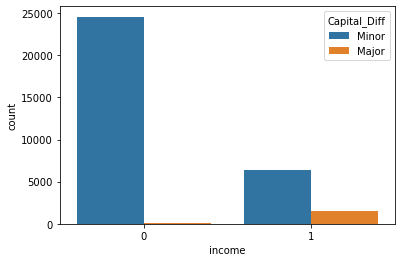

In [30]:
# Distributing Capital_Diff column in 2

dataset['Capital_Diff'] = pd.cut(dataset['Capital_Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital_Diff', data = dataset)

In [31]:
#Dividing hours of week in 3 major range

dataset['Hours_per_Week'] = pd.cut(dataset['hours_per_week'],bins = [0, 30, 40, 100],
                                   labels = ['Less_H', 'Normal_H', 'Extra_H'])

<AxesSubplot:xlabel='income', ylabel='count'>

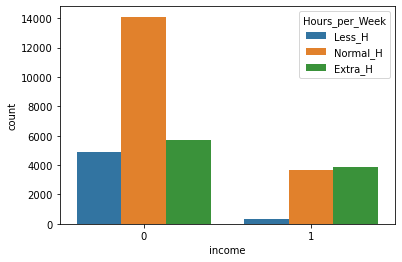

In [32]:
sns.countplot(x = 'income', hue = 'Hours_per_Week', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

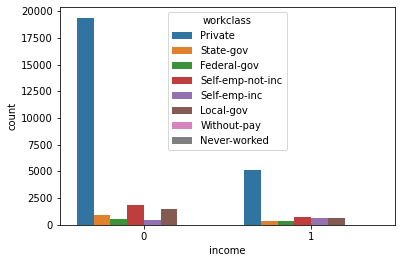

In [33]:
sns.countplot(x = 'income', hue = 'workclass', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

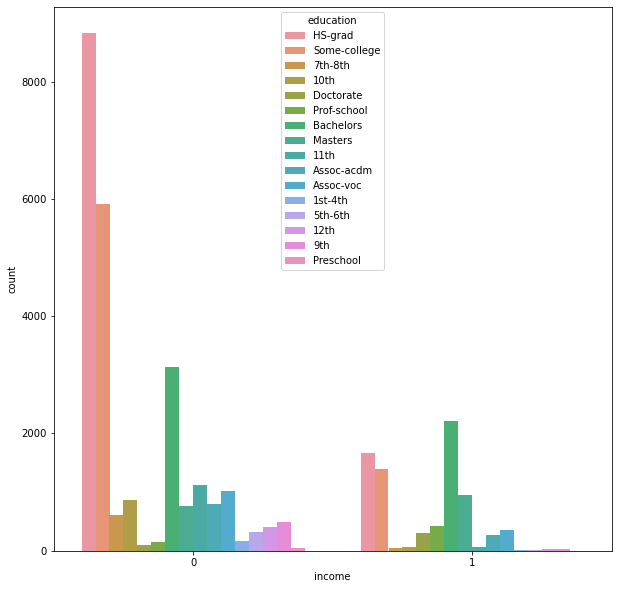

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x = 'income', hue = 'education', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

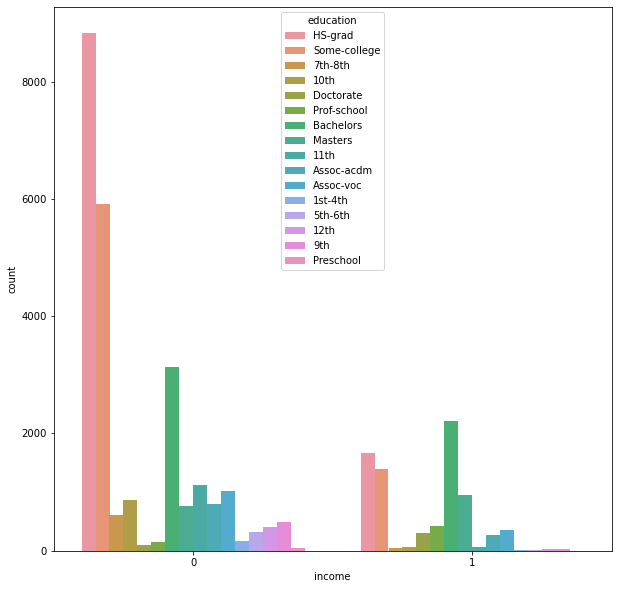

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x = 'income', hue = 'education', data = dataset)

In [36]:
#Combining the lower grades of education together

df.drop(['education_num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

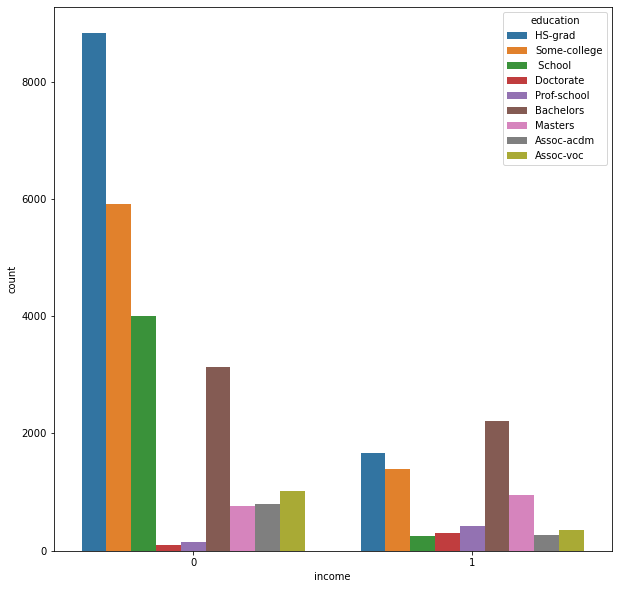

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x = 'income', hue = 'education', data = df)

<AxesSubplot:xlabel='income', ylabel='count'>

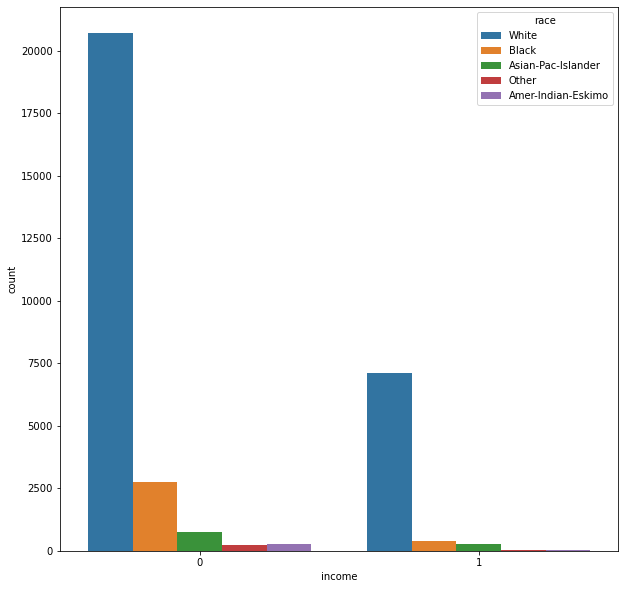

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x = 'income', hue = 'race', data = dataset)

In [39]:
df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

<AxesSubplot:xlabel='income', ylabel='count'>

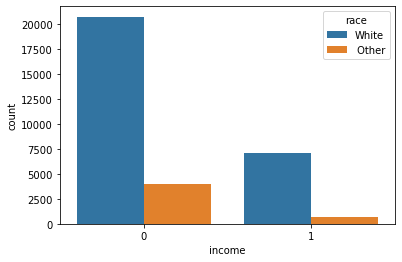

In [40]:
sns.countplot(x = 'income', hue = 'race', data = df)

In [41]:
countries = np.array(dataset['native_country'].unique())
countries = np.delete(countries, 0)

In [42]:
dataset['native_country'].replace(countries, 'Other', inplace = True)
df['native_country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='native_country', ylabel='count'>

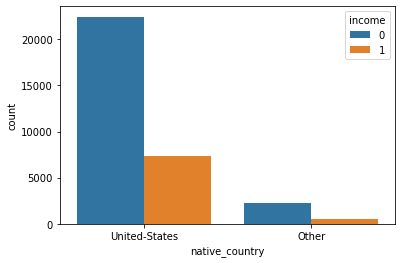

In [43]:
sns.countplot(x = 'native_country', hue = 'income', data = df)

In [44]:
df

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Other,Female,0,4356,40,United-States,0
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


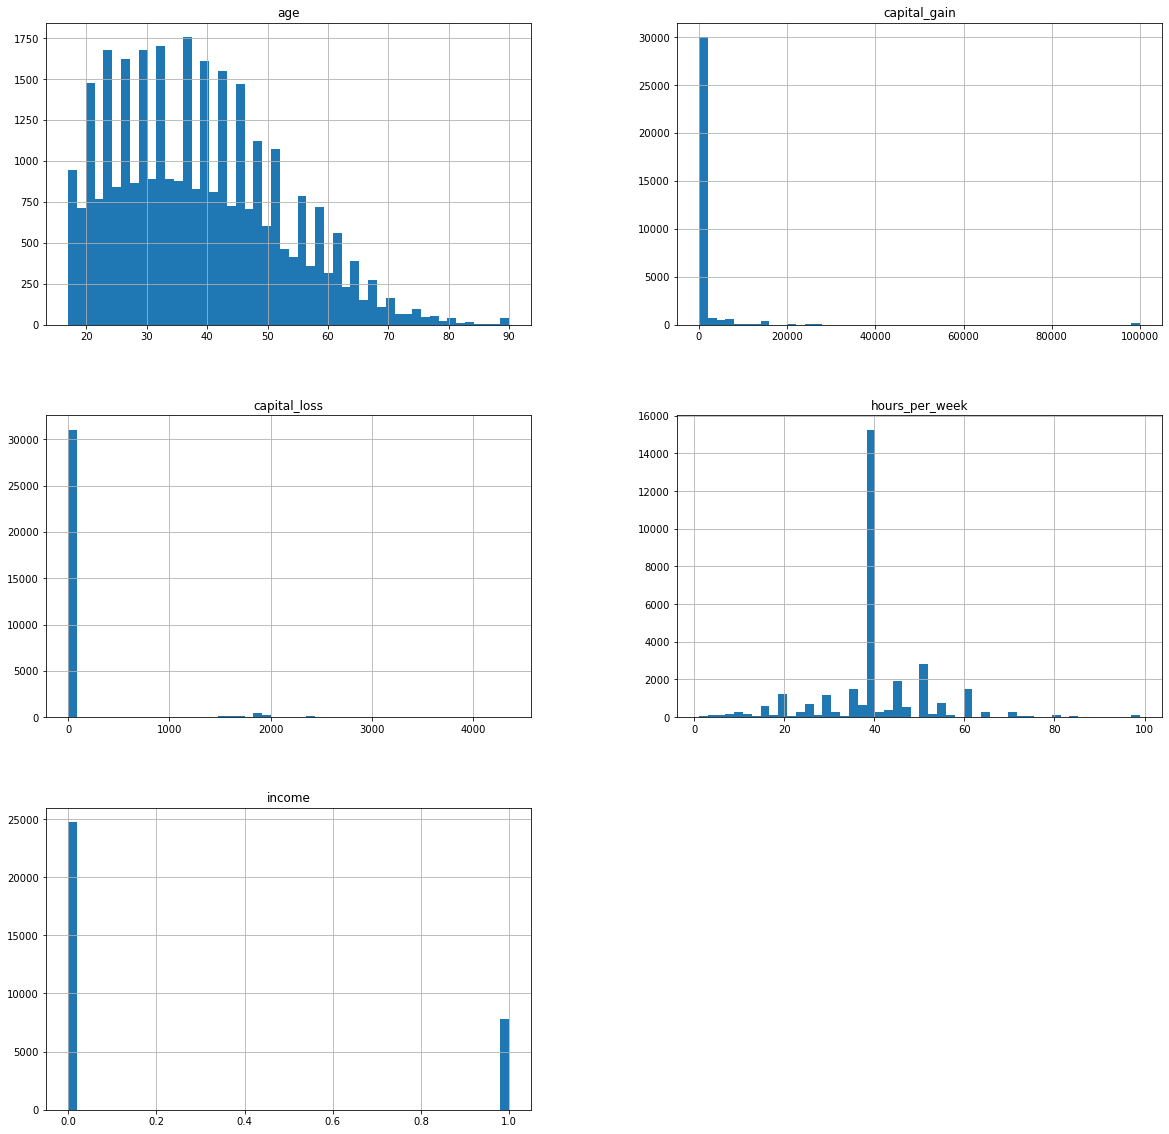

In [45]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
y=df['education'].values
df['education_']=le.fit_transform(y)
y=df['marital_status'].values
df['marital_status_']=le.fit_transform(y)
y=df['relationship'].values
df['relationship_']=le.fit_transform(y)
y=df['workclass'].values
df['workclass_']=le.fit_transform(y)
y=df['occupation'].values
df['occupationt']=le.fit_transform(y)
y=df['race'].values
df['racet']=le.fit_transform(y)
y=df['native_country'].values
df['country']=le.fit_transform(y)
y=df['sex'].values
df['gender']=le.fit_transform(y)

In [48]:
df.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income', 'education_',
       'marital_status_', 'relationship_', 'workclass_', 'occupationt',
       'racet', 'country', 'gender'],
      dtype='object')

In [49]:
df

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,native_country,income,education_,marital_status_,relationship_,workclass_,occupationt,racet,country,gender
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,...,United-States,0,5,6,1,3,9,1,1,0
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,...,United-States,0,5,6,1,3,3,1,1,0
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Other,Female,0,4356,...,United-States,0,8,6,4,3,9,0,1,0
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,...,United-States,0,0,0,4,3,6,1,1,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,...,United-States,0,8,5,3,3,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,...,United-States,0,8,4,1,3,10,1,1,1
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,United-States,0,1,2,5,3,12,1,1,0
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,United-States,1,5,2,0,3,6,1,1,1
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,United-States,0,5,6,4,3,0,1,1,0


In [50]:
df.drop(['workclass','education','occupation','marital_status','relationship','race','sex','native_country'],axis=1,inplace=True)
df.head()

,age,capital_gain,capital_loss,hours_per_week,income,education_,marital_status_,relationship_,workclass_,occupationt,racet,country,gender
0,90,0,4356,40,0,5,6,1,3,9,1,1,0
1,82,0,4356,18,0,5,6,1,3,3,1,1,0
2,66,0,4356,40,0,8,6,4,3,9,0,1,0
3,54,0,3900,40,0,0,0,4,3,6,1,1,0
4,41,0,3900,40,0,8,5,3,3,9,1,1,0


In [51]:
df.corr()

,age,capital_gain,capital_loss,hours_per_week,income,education_,marital_status_,relationship_,workclass_,occupationt,racet,country,gender
age,1.000000,0.077674,0.057775,0.068756,0.234037,-0.038063,-0.266288,-0.263698,0.040504,0.001739,0.033412,0.017993,0.088832
capital_gain,0.077674,1.000000,-0.031615,0.078409,0.223329,0.022917,-0.043393,-0.057919,0.031505,0.018021,0.014429,0.011299,0.048480
capital_loss,0.057775,-0.031615,1.000000,0.054256,0.150526,0.010524,-0.034187,-0.061062,0.002644,0.009680,0.021044,0.014458,0.045567
hours_per_week,0.068756,0.078409,0.054256,1.000000,0.229689,0.026037,-0.190519,-0.248974,0.042199,-0.012879,0.049345,0.008217,0.229309
income,0.234037,0.223329,0.150526,0.229689,1.000000,0.047620,-0.199307,-0.250918,0.002693,0.034625,0.085224,0.038942,0.215980
education_,-0.038063,0.022917,0.010524,0.026037,0.047620,1.000000,-0.022454,0.011678,0.006103,-0.041360,0.016146,0.112176,-0.033585
marital_status_,-0.266288,-0.043393,-0.034187,-0.190519,-0.199307,-0.022454,1.000000,0.185451,-0.020468,0.034962,-0.080376,-0.032974,-0.129314
relationship_,-0.263698,-0.057919,-0.061062,-0.248974,-0.250918,0.011678,0.185451,1.000000,-0.057947,-0.037451,-0.131913,-0.019720,-0.582454
workclass_,0.040504,0.031505,0.002644,0.042199,0.002693,0.006103,-0.020468,-0.057947,1.000000,0.007110,0.056849,-0.000773,0.071584
occupationt,0.001739,0.018021,0.009680,-0.012879,0.034625,-0.041360,0.034962,-0.037451,0.007110,1.000000,-0.004615,0.009270,0.047461


<AxesSubplot:>

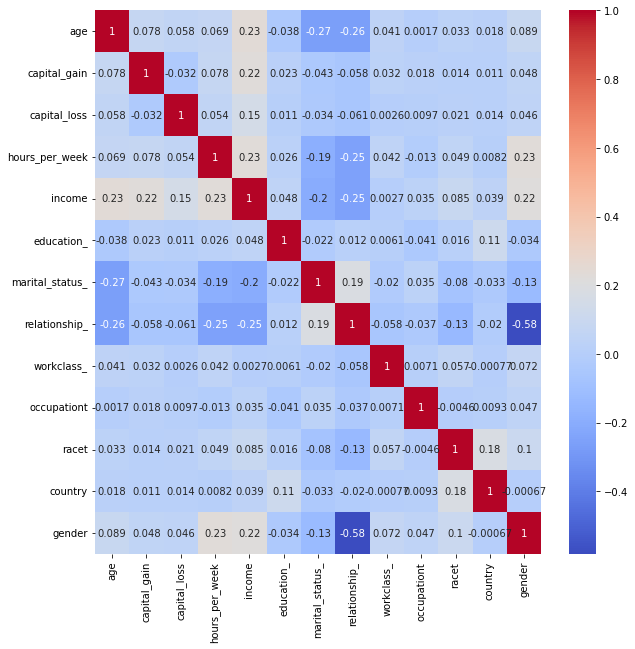

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

## spliting data

In [53]:
X=df.drop(['income'],axis=1)
X

,age,capital_gain,capital_loss,hours_per_week,education_,marital_status_,relationship_,workclass_,occupationt,racet,country,gender
0,90,0,4356,40,5,6,1,3,9,1,1,0
1,82,0,4356,18,5,6,1,3,3,1,1,0
2,66,0,4356,40,8,6,4,3,9,0,1,0
3,54,0,3900,40,0,0,4,3,6,1,1,0
4,41,0,3900,40,8,5,3,3,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,40,8,4,1,3,10,1,1,1
32557,27,0,0,38,1,2,5,3,12,1,1,0
32558,40,0,0,40,5,2,0,3,6,1,1,1
32559,58,0,0,40,5,6,4,3,0,1,1,0


In [54]:
y=df.income
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=4)

## using StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()

In [61]:
log_r.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred1=log_r.predict(X_test)

# accuracy score

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
score1=accuracy_score(y_test, y_pred1)
print(score1)


0.7992629747159382


In [65]:
# confusion matrix

print(confusion_matrix(y_test, y_pred1))

[[7095  323]
 [1638  713]]


In [66]:
# classification report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7418
           1       0.69      0.30      0.42      2351

    accuracy                           0.80      9769
   macro avg       0.75      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



# knn Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y_pred2=knn.predict(X_test)

In [70]:
#accuracy score

score2=accuracy_score(y_test,y_pred2)
score2

0.8235233903163067

In [71]:
#confusion matrix

print(confusion_matrix(y_test,y_pred2))

[[6696  722]
 [1002 1349]]


In [72]:
#classsification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7418
           1       0.65      0.57      0.61      2351

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769



# Decision Tree classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [74]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred3=tree.predict(X_test)

In [76]:
# accuracy_acore

score3=accuracy_score(y_test,y_pred3)

score3

0.8151294912478247

In [77]:
#confusion_matrix

print(confusion_matrix(y_test,y_pred3))

[[6522  896]
 [ 910 1441]]


In [78]:
# classification_report

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7418
           1       0.62      0.61      0.61      2351

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.81      0.82      0.81      9769



# svc

In [79]:
from sklearn.svm import SVC
svc=SVC()

In [80]:
svc = SVC(C = 15, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01)

In [81]:
y_pred4=svc.predict(X_test)

In [82]:
# accuracy_score

score4=accuracy_score(y_test,y_pred4)
score4

0.8132869280376702

In [83]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred4))

[[7229  189]
 [1635  716]]


In [84]:
#classifiaction_report

print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7418
           1       0.79      0.30      0.44      2351

    accuracy                           0.81      9769
   macro avg       0.80      0.64      0.66      9769
weighted avg       0.81      0.81      0.78      9769



# naive bayes classifier

In [85]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [86]:
nb.fit(X_train,y_train)

GaussianNB()

In [87]:
y_pred5=nb.predict(X_test)

In [88]:
# accuracy_score

score5=accuracy_score(y_test,y_pred5)
score5

0.7931210973487562

In [89]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred5))

[[7036  382]
 [1639  712]]


In [90]:
# classification_report

print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7418
           1       0.65      0.30      0.41      2351

    accuracy                           0.79      9769
   macro avg       0.73      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



# Using SMOTE

In [91]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [92]:
X_trains,y_trains = smote.fit_resample(X_train,y_train)

In [93]:
model = LogisticRegression()
model.fit(X_trains, y_trains)
predicteds=model.predict(X_test)
conf = confusion_matrix(y_test, predicteds)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicteds)*100, "%")
print()
print("Precision score for Logistic Regression is :",precision_score(y_test, predicteds,)*100, "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicteds,)*100, "%")

Confusion Matrix : 
 [[5306 2112]
 [ 611 1740]]

The accuracy of Logistic Regression is :  72.1261132152728 %

Precision score for Logistic Regression is : 45.17133956386293 %

Recall score for Logistic Regression is : 74.01105912377712 %


# Gradient Boosting Classifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc =  GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

In [96]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=180)

In [97]:
y_pred6 = gbc.predict(X_test)

In [98]:
# accuracy_score

score6=accuracy_score(y_test,y_pred6)
score6

0.8621148531067663

In [99]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred6))

[[6888  530]
 [ 817 1534]]


In [100]:
# classification report

print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7418
           1       0.74      0.65      0.69      2351

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



# Extreme Gradient Boosting

In [101]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [102]:
y_pred7 = xgb.predict(X_test)

In [103]:
# accuracy_score

score7=accuracy_score(y_test,y_pred7)
score7

0.8595557375371071

In [104]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred7))

[[6883  535]
 [ 837 1514]]


In [105]:
# classification report

print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7418
           1       0.74      0.64      0.69      2351

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.85      0.86      0.86      9769



# Ada boost

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)

In [107]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [108]:
y_pred8 = ada.predict(X_test)

In [109]:
# accuracy_score

score8=accuracy_score(y_test,y_pred8)
score8

0.8612959361244754

In [110]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred8))

[[6943  475]
 [ 880 1471]]


In [111]:
# classification report

print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7418
           1       0.76      0.63      0.68      2351

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [112]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree classifier','SVC','naive bayes classifier' , 
            'Gradient Boosting Classifier','XgBoost','Ada boost'],
    'Score': [score1,score2,score3,score4,score5,score6,score7,score8]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,0.862115
7,Ada boost,0.861296
6,XgBoost,0.859556
1,KNN,0.823523
2,Decision Tree classifier,0.815129
3,SVC,0.813287
0,Logistic Regression,0.799263
4,naive bayes classifier,0.793121


# Hyperparmeter Tuning

## xgb

In [113]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.004218646930284418

In [114]:
accuracies.mean()

0.8678925621425216

In [115]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [116]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search = GridSearchCV(estimator = xgb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = 4)
grid_search = grid_search.fit(X_train, y_train)

In [117]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [118]:
best_accuracy

0.8743422521027749

In [119]:
best_parameters

{'colsample_bytree': 0.6,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [121]:
parameters2 = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [122]:
grid_search2 = GridSearchCV(estimator = rf,
                           param_grid = parameters2,
                           scoring = 'accuracy',
                           n_jobs = 4)
grid_search_2 = grid_search2.fit(X_train, y_train)

In [123]:
best_accuracy2 = grid_search_2.best_score_
best_parameters2 = grid_search_2.best_params_

In [124]:
best_accuracy2

0.8631098326548099

In [125]:
best_parameters2

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 15}

#  K - Nearest Neighbors

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [127]:
parameters3 = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

In [128]:
grid_search3 = GridSearchCV(estimator = knn,
                           param_grid = parameters3,
                           scoring = 'accuracy',
                           n_jobs = 4)
grid_search_3 = grid_search3.fit(X_train, y_train)

In [129]:
best_accuracy3 = grid_search_3.best_score_
best_parameters3 = grid_search_3.best_params_

In [130]:
best_accuracy3

0.8312566332058416

In [131]:
best_parameters3

{'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 10, 'weights': 'uniform'}

In [132]:
models2 = pd.DataFrame({
    'tuned Models': ['XgBoost','Random Forest','KNN',],
    'Score2':[best_accuracy,best_accuracy2,best_accuracy3]
})

models2.sort_values(by = 'Score2', ascending = False)

,tuned Models,Score2
0,XgBoost,0.874342
1,Random Forest,0.863110
2,KNN,0.831257
